In [176]:
library(fpp3)
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following objects are masked from ‘package:fabletools’:

    accuracy, forecast




Rows: 48 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): month
dbl (1): ble

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


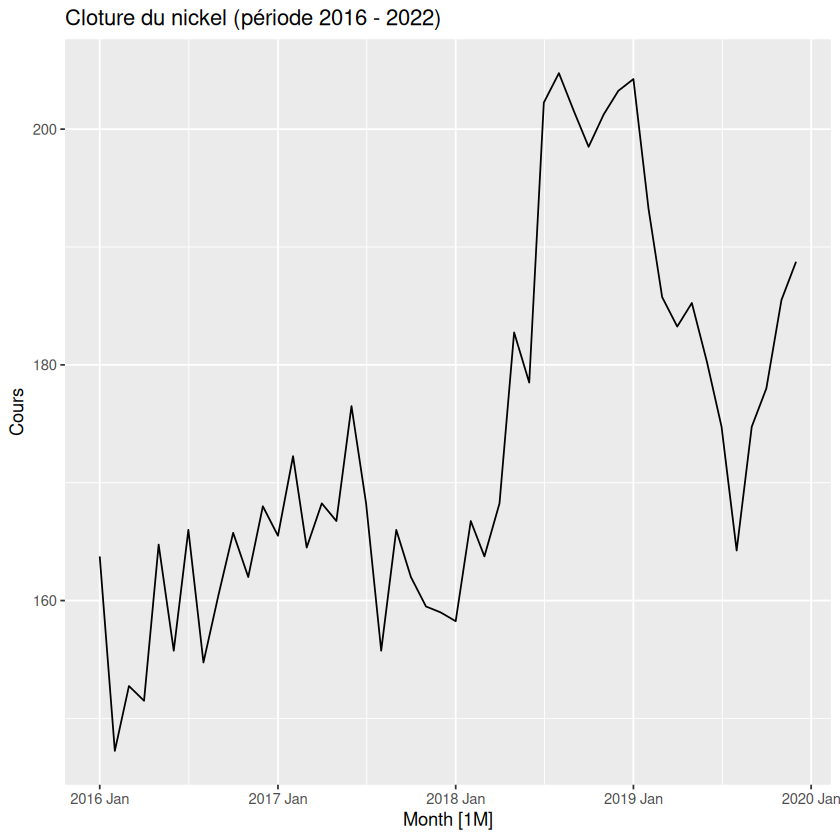

In [220]:
# Lecture des données
ble_19 <- readr::read_csv(file="data/ble.csv", n_max=48) |>
    mutate(Month = yearmonth(month)) |>
    select(- month) |>
    as_tsibble(index = Month)

autoplot(ble_19,ble) + 
    labs(title = "Cloture du nickel (période 2016 - 2022)",
         y = "Cours")

In [224]:
# Transformation log
lble_19 <- ble_19 |>
    mutate(ble = log(ble))

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


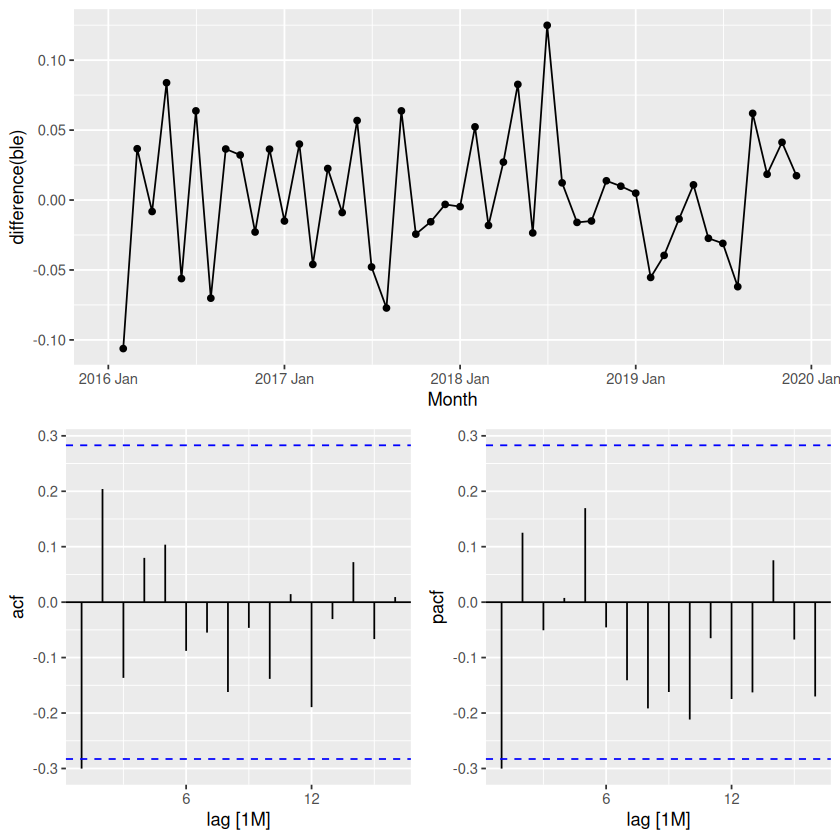

In [226]:
lble_19 |> 
    gg_tsdisplay(difference(ble), plot_type='partial')

Warning message in mean.default(x, na.rm = TRUE):
“argument is not numeric or logical: returning NA”
Plot variable not specified, automatically selected `.vars = ble`


"ARIMA(ble ~ PDQ(0, 0, 0), stepwise = FALSE)"
<model>
"<ARIMA(1,1,0)>"


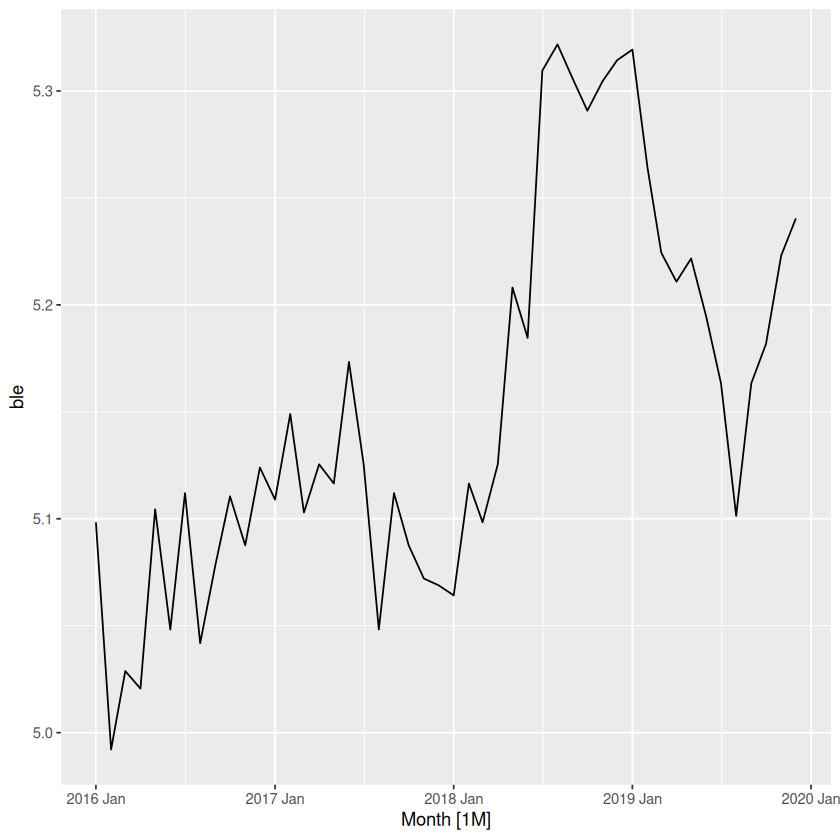

In [277]:
fit <- lble_19 |>
    model(ARIMA(ble ~ PDQ(0,0,0),stepwise=FALSE))

fc <- fit |>
    forecast(h=12)
    autoplot(lble_19) + 
